In [1]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

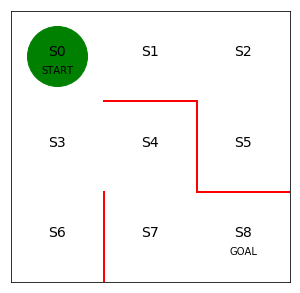

In [14]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

In [4]:
# 方策パラメータthetaを行動方策piにソフトマックス関数で変換する手法の定義


def softmax_convert_into_pi_from_theta(theta):
    '''ソフトマックス関数で割合を計算する'''

    beta = 1.0
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # thetaをexp(theta)へと変換

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # simpleに割合の計算の場合

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmaxで計算の場合

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi

In [5]:
# 初期の方策pi_0を求める
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [6]:
# 行動aと1step移動後の状態sを求める関数を定義


def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]の確率に従って、directionが選択される
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return [action, s_next]

In [7]:
# 迷路を解く関数の定義、状態と行動の履歴を出力


def goal_maze_ret_s_a(pi):
    s = 0  # スタート地点
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 現在の状態（つまり一番最後なのでindex=-1）の行動を代入

        s_a_history.append([next_s, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s

    return s_a_history

In [8]:
# 初期の方策で迷路を解く
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

[[0, 2], [3, 1], [4, 2], [7, 0], [4, 3], [3, 0], [0, 2], [3, 0], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 1], [4, 2], [7, 1], [8, nan]]
迷路を解くのにかかったステップ数は36です


In [9]:
# thetaの更新関数を定義します


def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 学習率
    T = len(s_a_history) - 1  # ゴールまでの総ステップ数

    [m, n] = theta.shape  # thetaの行列サイズを取得
    delta_theta = theta.copy()  # Δthetaの元を作成、numpyは計算高速化のためにポインタ参照をしているので、delta_theta = thetaはダメ

    # delta_thetaを要素ごとに求めます
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # thetaがnanでない場合

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 履歴から状態iのものを取り出すリスト内包表記です

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 状態iで行動jをしたものを取り出す

                N_i = len(SA_i)  # 状態iで行動した総回数
                N_ij = len(SA_ij)  # 状態iで行動jをとった回数
                
                # 初版では符号の正負に間違いがありました（修正日：180703）
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [10]:
# 方策の更新
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49930556 0.50069444 0.        ]
 [0.         0.49930556 0.         0.50069444]
 [0.         0.         0.50208332 0.49791668]
 [0.33425969 0.33333248 0.33240784 0.        ]
 [0.         0.         0.50069444 0.49930556]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [11]:
# 方策勾配法で迷路を解く

# 初版で、def update_thetaに間違いがあった関係で、終了条件を変更します（修正日：180703）
#stop_epsilon = 10**-8  # 10^-8よりも方策に変化が少なくなったら学習終了とする
stop_epsilon = 10**-4  # 10^-4よりも方策に変化が少なくなったら学習終了とする
# 終了条件は課題に寄って設定する必要がある


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continueがFalseになるまで繰り返す
    s_a_history = goal_maze_ret_s_a(pi)  # 方策πで迷路内を探索した履歴を求める
    new_theta = update_theta(theta, pi, s_a_history)  # パラメータΘを更新
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 方策πの更新

    print(np.sum(np.abs(new_pi - pi)))  # 方策の変化を出力
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.0076791416277796065
迷路を解くのにかかったステップ数は204です
0.014729062918529767
迷路を解くのにかかったステップ数は20です
0.03242942343430377
迷路を解くのにかかったステップ数は6です
0.048457444559525165
迷路を解くのにかかったステップ数は4です
0.01100237834023704
迷路を解くのにかかったステップ数は48です
0.018557518168476006
迷路を解くのにかかったステップ数は22です
0.025865400587003096
迷路を解くのにかかったステップ数は10です
0.013092267894548093
迷路を解くのにかかったステップ数は20です
0.020815764849141938
迷路を解くのにかかったステップ数は14です
0.018376317734958014
迷路を解くのにかかったステップ数は24です
0.01035870026641128
迷路を解くのにかかったステップ数は90です
0.023358585827750467
迷路を解くのにかかったステップ数は8です
0.02393703378508294
迷路を解くのにかかったステップ数は8です
0.03206861585708237
迷路を解くのにかかったステップ数は6です
0.009857977804069384
迷路を解くのにかかったステップ数は22です
0.02427218358518246
迷路を解くのにかかったステップ数は12です
0.024652917107632566
迷路を解くのにかかったステップ数は12です
0.023083836272178415
迷路を解くのにかかったステップ数は26です
0.016464422064538076
迷路を解くのにかかったステップ数は28です
0.01358693852843229
迷路を解くのにかかったステップ数は28です
0.013042939467321546
迷路を解くのにかかったステップ数は32です
0.018697214809155704
迷路を解くのにかかったステップ数は12です
0.028307911164037802
迷路を解くのにかかったステップ数は8です
0.0157615873838432
迷路を

0.01589485942690458
迷路を解くのにかかったステップ数は26です
0.03574534692159273
迷路を解くのにかかったステップ数は10です
0.018238612214238253
迷路を解くのにかかったステップ数は8です
0.01967936443450946
迷路を解くのにかかったステップ数は18です
0.02556403173515992
迷路を解くのにかかったステップ数は6です
0.026410129031351592
迷路を解くのにかかったステップ数は4です
0.025029196162747264
迷路を解くのにかかったステップ数は6です
0.02955092048634364
迷路を解くのにかかったステップ数は8です
0.013761213599269795
迷路を解くのにかかったステップ数は22です
0.01682630111751235
迷路を解くのにかかったステップ数は6です
0.015113557182488524
迷路を解くのにかかったステップ数は36です
0.018882242174398683
迷路を解くのにかかったステップ数は8です
0.017883191791238456
迷路を解くのにかかったステップ数は12です
0.011845501575311779
迷路を解くのにかかったステップ数は20です
0.024701219687468662
迷路を解くのにかかったステップ数は6です
0.025648682432215214
迷路を解くのにかかったステップ数は4です
0.01613049948662837
迷路を解くのにかかったステップ数は8です
0.018657707733152312
迷路を解くのにかかったステップ数は8です
0.021868467504981115
迷路を解くのにかかったステップ数は10です
0.020933450133435588
迷路を解くのにかかったステップ数は12です
0.014553108258900826
迷路を解くのにかかったステップ数は18です
0.016304985793794496
迷路を解くのにかかったステップ数は6です
0.018354909562529942
迷路を解くのにかかったステップ数は16です
0.024072651672220585
迷路を解くのにかか

0.016055264567124056
迷路を解くのにかかったステップ数は10です
0.010146970759084939
迷路を解くのにかかったステップ数は8です
0.013204435111455026
迷路を解くのにかかったステップ数は16です
0.01970811744958434
迷路を解くのにかかったステップ数は8です
0.0131240307764387
迷路を解くのにかかったステップ数は4です
0.012948678344725073
迷路を解くのにかかったステップ数は4です
0.011366329491650812
迷路を解くのにかかったステップ数は8です
0.01281354381168022
迷路を解くのにかかったステップ数は4です
0.01264360822827805
迷路を解くのにかかったステップ数は4です
0.012476631127547738
迷路を解くのにかかったステップ数は4です
0.014830871175704474
迷路を解くのにかかったステップ数は6です
0.012298178846492133
迷路を解くのにかかったステップ数は4です
0.012136970708038014
迷路を解くのにかかったステップ数は4です
0.016981312836167925
迷路を解くのにかかったステップ数は12です
0.012115975214875854
迷路を解くのにかかったステップ数は4です
0.011957550376386322
迷路を解くのにかかったステップ数は4です
0.011801870044513649
迷路を解くのにかかったステップ数は4です
0.011909092813381816
迷路を解くのにかかったステップ数は6です
0.011616343066633353
迷路を解くのにかかったステップ数は4です
0.014166765154464855
迷路を解くのにかかったステップ数は6です
0.011461286985879934
迷路を解くのにかかったステップ数は4です
0.011314125329931424
迷路を解くのにかかったステップ数は4です
0.013818037707652497
迷路を解くのにかかったステップ数は6です
0.022246736423261637
迷路を解くのにかかったステップ

0.01332909150504058
迷路を解くのにかかったステップ数は8です
0.007036345962827026
迷路を解くのにかかったステップ数は4です
0.010859849516618697
迷路を解くのにかかったステップ数は6です
0.00697106534778652
迷路を解くのにかかったステップ数は4です
0.006896781885258579
迷路を解くのにかかったステップ数は4です
0.006823595193311577
迷路を解くのにかかったステップ数は4です
0.00675148535096462
迷路を解くのにかかったステップ数は4です
0.006680432848648804
迷路を解くのにかかったステップ数は4です
0.01019493933767733
迷路を解くのにかかったステップ数は6です
0.0066353285903591325
迷路を解くのにかかったステップ数は4です
0.0065658622307518955
迷路を解くのにかかったステップ数は4です
0.010083184034817963
迷路を解くのにかかったステップ数は6です
0.010075762480661443
迷路を解くのにかかったステップ数は8です
0.010462418367090873
迷路を解くのにかかったステップ数は6です
0.010995088729353078
迷路を解くのにかかったステップ数は8です
0.019540174568
迷路を解くのにかかったステップ数は28です
0.006657559593489626
迷路を解くのにかかったステップ数は4です
0.014832865050407762
迷路を解くのにかかったステップ数は6です
0.01047948780606664
迷路を解くのにかかったステップ数は6です
0.011015803815824801
迷路を解くのにかかったステップ数は8です
0.014841400870056892
迷路を解くのにかかったステップ数は6です
0.01070664352026511
迷路を解くのにかかったステップ数は8です
0.006725122663729294
迷路を解くのにかかったステップ数は4です
0.013915013430356796
迷路を解くのにかかったステップ数は8です
0

0.0033325743277829167
迷路を解くのにかかったステップ数は4です
0.008522556189982086
迷路を解くのにかかったステップ数は8です
0.003358427069237613
迷路を解くのにかかったステップ数は4です
0.0033317848249766607
迷路を解くのにかかったステップ数は4です
0.006826515824085069
迷路を解くのにかかったステップ数は6です
0.0033298563666055436
迷路を解くのにかかったステップ数は4です
0.006857091999524431
迷路を解くのにかかったステップ数は6です
0.0033294073315580652
迷路を解くのにかかったステップ数は4です
0.008045295160389168
迷路を解くのにかかったステップ数は8です
0.0033427438149579852
迷路を解くのにかかったステップ数は4です
0.0033161908941663903
迷路を解くのにかかったステップ数は4です
0.0032899406684853277
迷路を解くのにかかったステップ数は4です
0.0032639887324070888
迷路を解くのにかかったステップ数は4です
0.011675915658747732
迷路を解くのにかかったステップ数は6です
0.0032475191586547325
迷路を解くのにかかったステップ数は4です
0.003222099956095986
迷路を解くのにかかったステップ数は4です
0.003196966437313223
迷路を解くのにかかったステップ数は4です
0.00317211449845356
迷路を解くのにかかったステップ数は4です
0.016306722134255325
迷路を解くのにかかったステップ数は8です
0.0031760136033731345
迷路を解くのにかかったステップ数は4です
0.006715717985118941
迷路を解くのにかかったステップ数は6です
0.003178135526095735
迷路を解くのにかかったステップ数は4です
0.0031535144493963357
迷路を解くのにかかったステップ数は4です
0.0031291676023825904
迷路

0.002001650947149096
迷路を解くのにかかったステップ数は4です
0.005311498860308815
迷路を解くのにかかったステップ数は6です
0.0020119904026740104
迷路を解くのにかかったステップ数は4です
0.006545121614266715
迷路を解くのにかかったステップ数は10です
0.00200839090758341
迷路を解くのにかかったステップ数は4です
0.001995643836627911
迷路を解くのにかかったステップ数は4です
0.0019830150174191957
迷路を解くのにかかったステップ数は4です
0.0019705030196857584
迷路を解くのにかかったステップ数は4です
0.011438327629376487
迷路を解くのにかかったステップ数は8です
0.0019699549801218616
迷路を解くのにかかったステップ数は4です
0.0019575691259984193
迷路を解くのにかかったステップ数は4です
0.0019452970966009134
迷路を解くのにかかったステップ数は4です
0.0019331375280259855
迷路を解くのにかかったステップ数は4です
0.0019210890763726451
迷路を解くのにかかったステップ数は4です
0.0019091504173957344
迷路を解くのにかかったステップ数は4です
0.001897320246167289
迷路を解くのにかかったステップ数は4です
0.001885597276747801
迷路を解くのにかかったステップ数は4です
0.0018739802418615628
迷路を解くのにかかったステップ数は4です
0.0018624678925744029
迷路を解くのにかかったステップ数は4です
0.011110061551730048
迷路を解くのにかかったステップ数は12です
0.0018589800071408397
迷路を解くのにかかったステップ数は4です
0.010753943130905101
迷路を解くのにかかったステップ数は6です
0.001864170840352987
迷路を解くのにかかったステップ数は4です
0.001852750259274831


0.0013938448511968127
迷路を解くのにかかったステップ数は4です
0.0013863876623579768
迷路を解くのにかかったステップ数は4です
0.0013789890414515407
迷路を解くのにかかったステップ数は4です
0.0013716483863556658
迷路を解くのにかかったステップ数は4です
0.0013643651025511266
迷路を解くのにかかったステップ数は4です
0.00135713860301475
迷路を解くのにかかったステップ数は4です
0.0013499683081034455
迷路を解くのにかかったステップ数は4です
0.003891075181496728
迷路を解くのにかかったステップ数は6です
0.0038481079346080332
迷路を解くのにかかったステップ数は6です
0.001370699356326846
迷路を解くのにかかったステップ数は4です
0.0013634166971838793
迷路を解くのにかかったステップ数は4です
0.0013561908474378007
迷路を解くのにかかったステップ数は4です
0.001349021227190557
迷路を解くのにかかったステップ数は4です
0.0013419072638094706
迷路を解くのにかかったステップ数は4です
0.0013348483918247667
迷路を解くのにかかったステップ数は4です
0.0013278440528214294
迷路を解くのにかかったステップ数は4です
0.003907094622930075
迷路を解くのにかかったステップ数は6です
0.0013367805363694515
迷路を解くのにかかったステップ数は4です
0.004211772848710452
迷路を解くのにかかったステップ数は6です
0.0013452272104423624
迷路を解くのにかかったステップ数は4です
0.003781000486120026
迷路を解くのにかかったステップ数は6です
0.004278205448025395
迷路を解くのにかかったステップ数は6です
0.0013601101305787053
迷路を解くのにかかったステップ数は4です
0.001352892991704379

0.0009575755999571382
迷路を解くのにかかったステップ数は4です
0.0009532599335290125
迷路を解くのにかかったステップ数は4です
0.003309276321668629
迷路を解くのにかかったステップ数は6です
0.0009608013968332302
迷路を解くのにかかったステップ数は4です
0.0009564615094970752
迷路を解くのにかかったステップ数は4です
0.0009521506113569084
迷路を解くのにかかったステップ数は4です
0.000947868447298883
迷路を解くのにかかったステップ数は4です
0.0033340867292341557
迷路を解くのにかかったステップ数は6です
0.0009558155196398993
迷路を解くのにかかったステップ数は4です
0.0009515048646974965
迷路を解くのにかかったステップ数は4です
0.000947222965309271
迷路を解くのにかかったステップ数は4です
0.0009429695687620254
迷路を解くのにかかったステップ数は4です
0.0009387444250875086
迷路を解くのにかかったステップ数は4です
0.0009345472870265249
迷路を解くのにかかったステップ数は4です
0.003057835192976373
迷路を解くのにかかったステップ数は6です
0.0009353641769540635
迷路を解くのにかかったステップ数は4です
0.0009312000689621798
迷路を解くのにかかったステップ数は4です
0.0009270633582252434
迷路を解くのにかかったステップ数は4です
0.0009229538073791295
迷路を解くのにかかったステップ数は4です
0.0009188711816012461
迷路を解くのにかかったステップ数は4です
0.0009148152485768633
迷路を解くのにかかったステップ数は4です
0.0009107857784694216
迷路を解くのにかかったステップ数は4です
0.0009067825438872947
迷路を解くのにかかったステップ数は4です
0.0009028053198

0.0027538628576559802
迷路を解くのにかかったステップ数は6です
0.002954534725437937
迷路を解くのにかかったステップ数は6です
0.0007374031716936222
迷路を解くのにかかったステップ数は4です
0.0007344573206107818
迷路を解くのにかかったステップ数は4です
0.0007315289501870353
迷路を解くのにかかったステップ数は4です
0.0007286179232112201
迷路を解くのにかかったステップ数は4です
0.0046110211372569244
迷路を解くのにかかったステップ数は8です
0.0007430929226549393
迷路を解くのにかかったステップ数は4です
0.0032505423716038644
迷路を解くのにかかったステップ数は6です
0.0007514664892455843
迷路を解くのにかかったステップ数は4です
0.0007484147461653372
迷路を解くのにかかったステップ数は4です
0.0007453814933965214
迷路を解くのにかかったステップ数は4です
0.0007423665821297692
迷路を解くのにかかったステップ数は4です
0.0007393698650456151
迷路を解くのにかかったステップ数は4です
0.0027889890534296205
迷路を解くのにかかったステップ数は6です
0.0007445322404188263
迷路を解くのにかかったステップ数は4です
0.0007415221123381749
迷路を解くのにかかったステップ数は4です
0.000738530136139337
迷路を解くのにかかったステップ数は4です
0.00268641630919475
迷路を解くのにかかったステップ数は6です
0.0007400577980482305
迷路を解くのにかかったステップ数は4です
0.0007370826704561836
迷路を解くのにかかったステップ数は4です
0.0032520285700624596
迷路を解くのにかかったステップ数は6です
0.0007455523888636913
迷路を解くのにかかったステップ数は4です
0.0077416902177

0.0005911029177596283
迷路を解くのにかかったステップ数は4です
0.0005889083586628971
迷路を解くのにかかったステップ数は4です
0.0005867260944498534
迷路を解くのにかかったステップ数は4です
0.0005845560330136404
迷路を解くのにかかったステップ数は4です
0.0005823980831087573
迷路を解くのにかかったステップ数は4です
0.0005802521543444052
迷路を解くのにかかったステップ数は4です
0.0005781181571714346
迷路を解くのにかかったステップ数は4です
0.018293521696211366
迷路を解くのにかかったステップ数は10です
0.000578293117338452
迷路を解くのにかかったステップ数は4です
0.0005761742484511646
迷路を解くのにかかったステップ数は4です
0.0005740670855167648
迷路を解くのにかかったステップ数は4です
0.0005719715420895236
迷路を解くのにかかったステップ数は4です
0.000569887532518288
迷路を解くのにかかったステップ数は4です
0.0005678149719435324
迷路を解くのにかかったステップ数は4です
0.0005657537762846429
迷路を解くのにかかったステップ数は4です
0.0005637038622325896
迷路を解くのにかかったステップ数は4です
0.0005616651472426584
迷路を解くのにかかったステップ数は4です
0.0005596375495229566
迷路を解くのにかかったステップ数は4です
0.0005576209880303364
迷路を解くのにかかったステップ数は4です
0.0005556153824581127
迷路を解くのにかかったステップ数は4です
0.0005536206532317269
迷路を解くのにかかったステップ数は4です
0.0005516367214976822
迷路を解くのにかかったステップ数は4です
0.0005496635091175005
迷路を解くのにかかったステップ数は4です
0.00215998110

0.00048645878077520355
迷路を解くのにかかったステップ数は4です
0.0004847678095431518
迷路を解くのにかかったステップ数は4です
0.0004830857964021641
迷路を解くのにかかったステップ数は4です
0.0004814126776002195
迷路を解くのにかかったステップ数は4です
0.0004797483899542411
迷路を解くのにかかったステップ数は4です
0.0004780928708410029
迷路を解くのにかかったステップ数は4です
0.00047644605819521443
迷路を解くのにかかったステップ数は4です
0.0004748078905001049
迷路を解くのにかかったステップ数は4です
0.00047317830678270806
迷路を解くのにかかったステップ数は4です
0.0004715572466091923
迷路を解くのにかかったステップ数は4です
0.0004699446500788032
迷路を解くのにかかったステップ数は4です
0.0004683404578160362
迷路を解くのにかかったステップ数は4です
0.00046674461096897144
迷路を解くのにかかったステップ数は4です
0.0004651570511992123
迷路を解くのにかかったステップ数は4です
0.0004635777206815385
迷路を解くのにかかったステップ数は4です
0.0004620065620936295
迷路を解くのにかかったステップ数は4です
0.002633206779415455
迷路を解くのにかかったステップ数は6です
0.0004688534117606481
迷路を解くのにかかったステップ数は4です
0.00046725041496053707
迷路を解くのにかかったステップ数は4です
0.00046565577999559474
迷路を解くのにかかったステップ数は4です
0.00046406944820856846
迷路を解くのにかかったステップ数は4です
0.0004624913614566309
迷路を解くのにかかったステップ数は4です
0.0025592802704883302
迷路を解くのにかかったステップ数は6です
0.000

0.00043508207847595126
迷路を解くのにかかったステップ数は4です
0.00043366468202189756
迷路を解くのにかかったステップ数は4です
0.0004322543059656417
迷路を解くのにかかったステップ数は4です
0.0004308509036115085
迷路を解くのにかかったステップ数は4です
0.006109712583779885
迷路を解くのにかかったステップ数は10です
0.0004373931281284431
迷路を解くのにかかったステップ数は4です
0.0004359690113168446
迷路を解くのにかかったステップ数は4です
0.00043455193798420597
迷路を解くのにかかったステップ数は4です
0.0004331418613608591
迷路を解くのにかかったステップ数は4です
0.006827721555376337
迷路を解くのにかかったステップ数は8です
0.0004403229435670612
迷路を解くのにかかったステップ数は4です
0.0004388846791188797
迷路を解くのにかかったステップ数は4です
0.00043745355417012036
迷路を解くのにかかったステップ数は4です
0.00043602952111390994
迷路を解くのにかかったステップ数は4です
0.00965345459656591
迷路を解くのにかかったステップ数は8です
0.00043626610736594365
迷路を解くのにかかったステップ数は4です
0.00043485193852795326
迷路を解くのにかかったステップ数は4です
0.00043344473099297606
迷路を解くのにかかったステップ数は4です
0.0024104712954337235
迷路を解くのにかかったステップ数は6です
0.002550761302346896
迷路を解くのにかかったステップ数は6です
0.0004471859584066311
迷路を解くのにかかったステップ数は4です
0.000445711537326067
迷路を解くのにかかったステップ数は4です
0.0004442445080567077
迷路を解くのにかかったステップ数は4です
0.000442

0.00036045928440696026
迷路を解くのにかかったステップ数は4です
0.00035939260158148606
迷路を解くのにかかったステップ数は4です
0.0003583307259840164
迷路を解くのにかかったステップ数は4です
0.00035727362842674984
迷路を解くのにかかったステップ数は4です
0.000356221279944946
迷路を解くのにかかったステップ数は4です
0.00035517365179432714
迷路を解くのにかかったステップ数は4です
0.00035413071544971794
迷路を解くのにかかったステップ数は4です
0.000353092442603245
迷路を解くのにかかったステップ数は4です
0.0003520588051602429
迷路を解くのにかかったステップ数は4です
0.00035102977524063134
迷路を解くのにかかったステップ数は4です
0.0020816703596574504
迷路を解くのにかかったステップ数は6です
0.0003548939273642429
迷路を解くのにかかったステップ数は4です
0.00035385276181381167
迷路を解くのにかかったステップ数は4です
0.000352816243104178
迷路を解くのにかかったステップ数は4です
0.0003517843433266492
迷路を解くのにかかったステップ数は4です
0.0003507570347835061
迷路を解くのにかかったステップ数は4です
0.00034973428998291353
迷路を解くのにかかったステップ数は4です
0.00034871608164249723
迷路を解くのにかかったステップ数は4です
0.00034770238268397313
迷路を解くのにかかったステップ数は4です
0.0003466931662322592
迷路を解くのにかかったステップ数は4です
0.0020718523613768858
迷路を解くのにかかったステップ数は6です
0.000351581886023411
迷路を解くのにかかったステップ数は4です
0.00035055254835295035
迷路を解くのにかかったステップ数は4です
0.00

0.0002942108016210296
迷路を解くのにかかったステップ数は4です
0.000293437476720667
迷路を解くのにかかったステップ数は4です
0.00029266722404023074
迷路を解くのにかかったステップ数は4です
0.00029190002721720537
迷路を解くのにかかったステップ数は4です
0.0002911358699961737
迷路を解くのにかかったステップ数は4です
0.00029037473623155785
迷路を解くのにかかったステップ数は4です
0.0002896166098850378
迷路を解くのにかかったステップ数は4です
0.000288861475024757
迷路を解くのにかかったステップ数は4です
0.0002881093158244967
迷路を解くのにかかったステップ数は4です
0.000287360116563766
迷路を解くのにかかったステップ数は4です
0.00203031003056911
迷路を解くのにかかったステップ数は6です
0.00029202729615753625
迷路を解くのにかかったステップ数は4です
0.0002912602287277119
迷路を解くのにかかったステップ数は4です
0.00029049621121316274
迷路を解くのにかかったステップ数は4です
0.0002897352273355351
迷路を解くのにかかったステップ数は4です
0.0002889772609272409
迷路を解くのにかかったステップ数は4です
0.00028822229592696813
迷路を解くのにかかったステップ数は4です
0.00028747031638237316
迷路を解くのにかかったステップ数は4です
0.005679940069340476
迷路を解くのにかかったステップ数は10です
0.0002932273156421167
迷路を解くのにかかったステップ数は4です
0.0002924569584109582
迷路を解くのにかかったステップ数は4です
0.0002916896629026333
迷路を解くのにかかったステップ数は4です
0.00029092541278553236
迷路を解くのにかかったステップ数は4です
0.000290

0.00026654749043580894
迷路を解くのにかかったステップ数は4です
0.00026587066790904716
迷路を解くのにかかったステップ数は4です
0.0002651964663277148
迷路を解くのにかかったステップ数は4です
0.0002645248719725605
迷路を解くのにかかったステップ数は4です
0.00026385587121679
迷路を解くのにかかったステップ数は4です
0.00026318945052220856
迷路を解くのにかかったステップ数は4です
0.0015201282338961758
迷路を解くのにかかったステップ数は6です
0.0002646393909170649
迷路を解くのにかかったステップ数は4です
0.00026397220434100366
迷路を解くのにかかったステップ数は4です
0.00026330757861331953
迷路を解くのにかかったステップ数は4です
0.001834499505164365
迷路を解くのにかかったステップ数は6です
0.0002668933523895609
迷路を解くのにかかったステップ数は4です
0.0002662173416645829
迷路を解くのにかかったステップ数は4です
0.0002655439360705874
迷路を解くのにかかったステップ数は4です
0.00026487312206831606
迷路を解くのにかかったステップ数は4です
0.0002642048862065982
迷路を解くのにかかったステップ数は4です
0.00026353921512365514
迷路を解くのにかかったステップ数は4です
0.0002628760955431502
迷路を解くのにかかったステップ数は4です
0.00026221551427733393
迷路を解くのにかかったステップ数は4です
0.00026155745822315814
迷路を解くのにかかったステップ数は4です
0.001854450068060308
迷路を解くのにかかったステップ数は6です
0.00026527977892312933
迷路を解くのにかかったステップ数は4です
0.0002646095178339986
迷路を解くのにかかったステップ数は4です
0.001

0.00027256521291708045
迷路を解くのにかかったステップ数は4です
0.000271861945405575
迷路を解くのにかかったステップ数は4です
0.002047450729934173
迷路を解くのにかかったステップ数は6です
0.00027672760191431445
迷路を解くのにかかったステップ数は4です
0.00027600526503079
迷路を解くのにかかったステップ数は4です
0.0002752858067221614
迷路を解くのにかかったステップ数は4です
0.00027456921150793324
迷路を解くのにかかったステップ数は4です
0.000273855464009206
迷路を解くのにかかったステップ数は4です
0.0002731445489532469
迷路を解くのにかかったステップ数は4です
0.00027243645116976564
迷路を解くのにかかったステップ数は4です
0.00027173115559012313
迷路を解くのにかかったステップ数は4です
0.0017590752244514476
迷路を解くのにかかったステップ数は6です
0.0002754003896561809
迷路を解くのにかかったステップ数は4です
0.005651796207935454
迷路を解くのにかかったステップ数は8です
0.00027969112153967274
迷路を解くのにかかったステップ数は4です
0.00027895606594100647
迷路を解くのにかかったステップ数は4です
0.0002782239631977171
迷路を解くのにかかったステップ数は4です
0.0002774947972836207
迷路を解くのにかかったステップ数は4です
0.00027676855228118274
迷路を解くのにかかったステップ数は4です
0.00027604521238264526
迷路を解くのにかかったステップ数は4です
0.001803769311151452
迷路を解くのにかかったステップ数は6です
0.0002799329518107692
迷路を解くのにかかったステップ数は4です
0.0018358505121375233
迷路を解くのにかかったステップ数は6です
0.0021586

0.00025212196726746676
迷路を解くのにかかったステップ数は4です
0.00025148965442085836
迷路を解くのにかかったステップ数は4です
0.0002508597793330902
迷路を解くのにかかったステップ数は4です
0.0020665869159272963
迷路を解くのにかかったステップ数は6です
0.0002560735462771458
迷路を解くのにかかったステップ数は4です
0.00025542221204472026
迷路を解くのにかかったステップ数は4です
0.0002547734326573507
迷路を解くのにかかったステップ数は4です
0.00025412719445952123
迷路を解くのにかかったステップ数は4です
0.00025348348389031897
迷路を解くのにかかったステップ数は4です
0.0002528422874803881
迷路を解くのにかかったステップ数は4です
0.00025220359185142496
迷路を解くのにかかったステップ数は4です
0.0002515673837148718
迷路を解くのにかかったステップ数は4です
0.0017564341027019367
迷路を解くのにかかったステップ数は6です
0.0002554671431610443
迷路を解くのにかかったステップ数は4です
0.0002548158750626077
迷路を解くのにかかったステップ数は4です
0.0016853209086719178
迷路を解くのにかかったステップ数は6です
0.0002574395299721876
迷路を解くのにかかったステップ数は4です
0.00025678192666615286
迷路を解くのにかかったステップ数は4です
0.0002561269133942671
迷路を解くのにかかったステップ数は4です
0.0002554744762666133
迷路を解くのにかかったステップ数は4です
0.0002548246014892966
迷路を解くのにかかったステップ数は4です
0.0002541772753609558
迷路を解くのにかかったステップ数は4です
0.0002535324842746975
迷路を解くのにかかったステップ数は4です
0.00

0.00022972190477349094
迷路を解くのにかかったステップ数は4です
0.001699431188354904
迷路を解くのにかかったステップ数は6です
0.00023333974417013778
迷路を解くのにかかったステップ数は4です
0.00023277377053136823
迷路を解くのにかかったステップ数は4です
0.0002322099111540174
迷路を解くのにかかったステップ数は4です
0.00023164815528726318
迷路を解くのにかかったステップ数は4です
0.0016015597033835448
迷路を解くのにかかったステップ数は6です
0.00023410032869268863
迷路を解くのにかかったステップ数は4です
0.00023353266396076988
迷路を解くのにかかったステップ数は4です
0.00023296711530606563
迷路を解くのにかかったステップ数は4です
0.00023240367201122353
迷路を解くのにかかったステップ数は4です
0.00023184232342940772
迷路を解くのにかかったステップ数は4です
0.00023128305898128913
迷路を解くのにかかったステップ数は4です
0.00023072586815530392
迷路を解くのにかかったステップ数は4です
0.0002301707405072389
迷路を解くのにかかったステップ数は4です
0.00022961766566019504
迷路を解くのにかかったステップ数は4です
0.0002290666333010765
迷路を解くのにかかったステップ数は4です
0.00022851763318523788
迷路を解くのにかかったステップ数は4です
0.00022797065513162525
迷路を解くのにかかったステップ数は4です
0.00022742568902316823
迷路を解くのにかかったステップ数は4です
0.00022688272480870034
迷路を解くのにかかったステップ数は4です
0.00022634175249884939
迷路を解くのにかかったステップ数は4です
0.00022580276216871593
迷路を解くのにかかったステップ

0.00018657450679933872
迷路を解くのにかかったステップ数は4です
0.00018618068314613621
迷路を解くのにかかったステップ数は4です
0.0001857881163589252
迷路を解くのにかかったステップ数は4です
0.0001853968010650294
迷路を解くのにかかったステップ数は4です
0.00018500673191841968
迷路を解くのにかかったステップ数は4です
0.0001846179036015909
迷路を解くのにかかったステップ数は4です
0.00018423031082675893
迷路を解くのにかかったステップ数は4です
0.00018384394833393172
迷路を解くのにかかったステップ数は4です
0.00018345881089044946
迷路を解くのにかかったステップ数は4です
0.00018307489329246265
迷路を解くのにかかったステップ数は4です
0.00018269219036305163
迷路を解くのにかかったステップ数は4です
0.00018231069695389367
迷路を解くのにかかったステップ数は4です
0.00018193040794253768
迷路を解くのにかかったステップ数は4です
0.00018155131823461776
迷路を解くのにかかったステップ数は4です
0.00018117342276325298
迷路を解くのにかかったステップ数は4です
0.00018079671648783824
迷路を解くのにかかったステップ数は4です
0.00018042119439364533
迷路を解くのにかかったステップ数は4です
0.0001800468514938959
迷路を解くのにかかったステップ数は4です
0.00017967368282690611
迷路を解くのにかかったステップ数は4です
0.00017930168345767564
迷路を解くのにかかったステップ数は4です
0.00017893084847797093
迷路を解くのにかかったステップ数は4です
0.0001785611730043997
迷路を解くのにかかったステップ数は4です
0.00017819265217822872
迷路を解くのにかかったステッ

0.00016852874295162149
迷路を解くのにかかったステップ数は4です
0.0001681883127068306
迷路を解くのにかかったステップ数は4です
0.00016784892419118534
迷路を解くのにかかったステップ数は4です
0.00016751057313014843
迷路を解くのにかかったステップ数は4です
0.00016717325526883868
迷路を解くのにかかったステップ数は4です
0.001582936952444134
迷路を解くのにかかったステップ数は6です
0.00017019268654429494
迷路を解くのにかかったステップ数は4です
0.00016984600795134225
迷路を解くのにかかったステップ数は4です
0.0001695004010783905
迷路を解くのにかかったステップ数は4です
0.00016915586147392067
迷路を解くのにかかったステップ数は4です
0.0001688123847104709
迷路を解くのにかかったステップ数は4です
0.0001684699663833892
迷路を解くのにかかったステップ数は4です
0.0001681286021114302
迷路を解くのにかかったステップ数は4です
0.00016778828753576287
迷路を解くのにかかったステップ数は4です
0.0001674490183192507
迷路を解くのにかかったステップ数は4です
0.00016711079014954458
迷路を解くのにかかったステップ数は4です
0.00016677359873431587
迷路を解くのにかかったステップ数は4です
0.00016643743980472928
迷路を解くのにかかったステップ数は4です
0.00016610230911384867
迷路を解くのにかかったステップ数は4です
0.00016576820243619818
迷路を解くのにかかったステップ数は4です
0.00016543511556861915
迷路を解くのにかかったステップ数は4です
0.00016510304432925532
迷路を解くのにかかったステップ数は4です
0.0001647719845586943
迷路を解くのにかかったステップ数は4

0.00013221009886713042
迷路を解くのにかかったステップ数は4です
0.00013197292879324474
迷路を解くのにかかったステップ数は4です
0.00013173640427629682
迷路を解くのにかかったステップ数は4です
0.00013150052295615722
迷路を解くのにかかったステップ数は4です
0.00013126528248225827
迷路を解くのにかかったステップ数は4です
0.00013103068051636274
迷路を解くのにかかったステップ数は4です
0.00013079671472917588
迷路を解くのにかかったステップ数は4です
0.00013056338280516971
迷路を解くのにかかったステップ数は4です
0.00013033068243489994
迷路を解くのにかかったステップ数は4です
0.00013009861132436476
迷路を解くのにかかったステップ数は4です
0.000129867167186078
迷路を解くのにかかったステップ数は4です
0.00012963634774514586
迷路を解くのにかかったステップ数は4です
0.00012940615073646182
迷路を解くのにかかったステップ数は4です
0.00012917657390466505
迷路を解くのにかかったステップ数は4です
0.00012894761500599136
迷路を解くのにかかったステップ数は4です
0.00012871927180559128
迷路を解くのにかかったステップ数は4です
0.0001284915420799726
迷路を解くのにかかったステップ数は4です
0.00012826442361431496
迷路を解くのにかかったステップ数は4です
0.0001280379142046869
迷路を解くのにかかったステップ数は4です
0.00012781201165694075
迷路を解くのにかかったステップ数は4です
0.00012758671378740143
迷路を解くのにかかったステップ数は4です
0.00012736201842159824
迷路を解くのにかかったステップ数は4です
0.00012713792339482353
迷路を解くのにかかったステ

0.00010515950671385367
迷路を解くのにかかったステップ数は4です
0.00010499218376371772
迷路を解くのにかかったステップ数は4です
0.0001048252645910689
迷路を解くのにかかったステップ数は4です
0.00010465874788411107
迷路を解くのにかかったステップ数は4です
0.00010449263234014322
迷路を解くのにかかったステップ数は4です
0.0001043269166589051
迷路を解くのにかかったステップ数は4です
0.00010416159954711006
迷路を解くのにかかったステップ数は4です
0.00010399667971553589
迷路を解くのにかかったステップ数は4です
0.00010383215588097988
迷路を解くのにかかったステップ数は4です
0.0010984720525520821
迷路を解くのにかかったステップ数は6です
0.00010537674168818907
迷路を解くのにかかったステップ数は4です
0.00010520852318519208
迷路を解くのにかかったステップ数は4です
0.00010504071252528425
迷路を解くのにかかったステップ数は4です
0.00010487330837567407
迷路を解くのにかかったステップ数は4です
0.00010470630941266171
迷路を解くのにかかったステップ数は4です
0.00010453971431500543
迷路を解くのにかかったステップ数は4です
0.00010437352176845965
迷路を解くのにかかったステップ数は4です
0.0001042077304637054
迷路を解くのにかかったステップ数は4です
0.00010404233909724024
迷路を解くのにかかったステップ数は4です
0.00010387734636979964
迷路を解くのにかかったステップ数は4です
0.00010371275098934249
迷路を解くのにかかったステップ数は4です
0.00010354855166648178
迷路を解くのにかかったステップ数は4です
0.00010338474711915971
迷路を解くのにかかったステ

In [12]:
# 最終的な方策を確認
np.set_printoptions(precision=3, suppress=True)  # 有効桁数3、指数表示しないという設定
print(pi)

[[0.    0.016 0.984 0.   ]
 [0.    0.288 0.    0.712]
 [0.    0.    0.385 0.615]
 [0.009 0.977 0.014 0.   ]
 [0.    0.    0.989 0.011]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.015 0.985 0.    0.   ]]


In [13]:
# エージェントの移動の様子を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)


def animate(i):
    # フレームごとの描画内容
    state = s_a_history[i][0]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())